In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Not a great experience. I co...
1,Not Verified | I was excited to fly BA as I'd ...
2,Not Verified | I just want to warn everyone o...
3,Not Verified | Paid for business class travell...
4,✅ Trip Verified | The plane was extremely dir...


In [4]:
df.tail()

,reviews
995,✅ Trip Verified | London to Seoul. I normally...
996,✅ Trip Verified | London Heathrow to New York...
997,✅ Trip Verified | San Diego to London. From th...
998,✅ Trip Verified | Gatwick to St Lucia. Flew B...
999,✅ Trip Verified | London to Chennai. It was a...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [6]:
df.describe()

,reviews
count,1000
unique,1000
top,✅ Trip Verified | Not a great experience. I co...
freq,1


In [7]:
df.isnull().sum()

reviews    0
dtype: int64

In [8]:
df.isnull()

,reviews
0,False
1,False
2,False
3,False
4,False
...,...
995,False
996,False
997,False
998,False


In [9]:
df

,reviews
0,✅ Trip Verified | Not a great experience. I co...
1,Not Verified | I was excited to fly BA as I'd ...
2,Not Verified | I just want to warn everyone o...
3,Not Verified | Paid for business class travell...
4,✅ Trip Verified | The plane was extremely dir...
...,...
995,✅ Trip Verified | London to Seoul. I normally...
996,✅ Trip Verified | London Heathrow to New York...
997,✅ Trip Verified | San Diego to London. From th...
998,✅ Trip Verified | Gatwick to St Lucia. Flew B...


In [10]:
import matplotlib.pyplot as plt

In [11]:
%matplotlib inline

In [12]:
df

,reviews
0,✅ Trip Verified | Not a great experience. I co...
1,Not Verified | I was excited to fly BA as I'd ...
2,Not Verified | I just want to warn everyone o...
3,Not Verified | Paid for business class travell...
4,✅ Trip Verified | The plane was extremely dir...
...,...
995,✅ Trip Verified | London to Seoul. I normally...
996,✅ Trip Verified | London Heathrow to New York...
997,✅ Trip Verified | San Diego to London. From th...
998,✅ Trip Verified | Gatwick to St Lucia. Flew B...


In [13]:
df.iloc[1]

reviews    Not Verified | I was excited to fly BA as I'd ...
Name: 1, dtype: object

In [14]:
df.shape

(1000, 1)

In [15]:
df.columns

Index(['reviews'], dtype='object')

In [16]:
df.value_counts()

reviews                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
Not Verified |  \r\nMiami to London Heathrow wit

In [17]:
df.reviews= df.reviews.str.split('|',expand=True)[1]
# it helps to remove words before |

In [18]:
df

,reviews
0,Not a great experience. I could not check in ...
1,I was excited to fly BA as I'd not travelled ...
2,I just want to warn everyone of the worst cu...
3,Paid for business class travelling Cairo to L...
4,The plane was extremely dirty with chocolate...
...,...
995,London to Seoul. I normally fly business but...
996,London Heathrow to New York JFK. Bag drop di...
997,San Diego to London. From the moment that I b...
998,Gatwick to St Lucia. Flew BA new revamped bu...


In [19]:
import re

In [20]:
df['Cleaned Reviews'] = df['reviews'].apply(lambda x: re.sub('[^A-Za-z]+', ' ', str(x)))
df.head()

,reviews,Cleaned Reviews
0,Not a great experience. I could not check in ...,Not a great experience I could not check in o...
1,I was excited to fly BA as I'd not travelled ...,I was excited to fly BA as I d not travelled ...
2,I just want to warn everyone of the worst cu...,I just want to warn everyone of the worst cus...
3,Paid for business class travelling Cairo to L...,Paid for business class travelling Cairo to L...
4,The plane was extremely dirty with chocolate...,The plane was extremely dirty with chocolate ...


In [21]:
df['Cleaned Reviews'] = df['reviews'].str.upper()

In [22]:
df

,reviews,Cleaned Reviews
0,Not a great experience. I could not check in ...,NOT A GREAT EXPERIENCE. I COULD NOT CHECK IN ...
1,I was excited to fly BA as I'd not travelled ...,I WAS EXCITED TO FLY BA AS I'D NOT TRAVELLED ...
2,I just want to warn everyone of the worst cu...,I JUST WANT TO WARN EVERYONE OF THE WORST CU...
3,Paid for business class travelling Cairo to L...,PAID FOR BUSINESS CLASS TRAVELLING CAIRO TO L...
4,The plane was extremely dirty with chocolate...,THE PLANE WAS EXTREMELY DIRTY WITH CHOCOLATE...
...,...,...
995,London to Seoul. I normally fly business but...,LONDON TO SEOUL. I NORMALLY FLY BUSINESS BUT...
996,London Heathrow to New York JFK. Bag drop di...,LONDON HEATHROW TO NEW YORK JFK. BAG DROP DI...
997,San Diego to London. From the moment that I b...,SAN DIEGO TO LONDON. FROM THE MOMENT THAT I B...
998,Gatwick to St Lucia. Flew BA new revamped bu...,GATWICK TO ST LUCIA. FLEW BA NEW REVAMPED BU...


In [23]:
# Removing Stopwords
from nltk.corpus import stopwords
words = set(stopwords.words('english'))

df['Cleaned Reviews'] = df['Cleaned Reviews'].apply(lambda x: ' '.join([word for word in x.split() if word not in words]))

In [24]:
df

,reviews,Cleaned Reviews
0,Not a great experience. I could not check in ...,NOT A GREAT EXPERIENCE. I COULD NOT CHECK IN O...
1,I was excited to fly BA as I'd not travelled ...,I WAS EXCITED TO FLY BA AS I'D NOT TRAVELLED W...
2,I just want to warn everyone of the worst cu...,I JUST WANT TO WARN EVERYONE OF THE WORST CUST...
3,Paid for business class travelling Cairo to L...,PAID FOR BUSINESS CLASS TRAVELLING CAIRO TO LO...
4,The plane was extremely dirty with chocolate...,THE PLANE WAS EXTREMELY DIRTY WITH CHOCOLATE S...
...,...,...
995,London to Seoul. I normally fly business but...,LONDON TO SEOUL. I NORMALLY FLY BUSINESS BUT T...
996,London Heathrow to New York JFK. Bag drop di...,LONDON HEATHROW TO NEW YORK JFK. BAG DROP DID ...
997,San Diego to London. From the moment that I b...,SAN DIEGO TO LONDON. FROM THE MOMENT THAT I BO...
998,Gatwick to St Lucia. Flew BA new revamped bu...,GATWICK TO ST LUCIA. FLEW BA NEW REVAMPED BUSI...


In [25]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

df['Cleaned Reviews'] = df['Cleaned Reviews'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [26]:
df

,reviews,Cleaned Reviews
0,Not a great experience. I could not check in ...,NOT A GREAT EXPERIENCE. I COULD NOT CHECK IN O...
1,I was excited to fly BA as I'd not travelled ...,I WAS EXCITED TO FLY BA AS I'D NOT TRAVELLED W...
2,I just want to warn everyone of the worst cu...,I JUST WANT TO WARN EVERYONE OF THE WORST CUST...
3,Paid for business class travelling Cairo to L...,PAID FOR BUSINESS CLASS TRAVELLING CAIRO TO LO...
4,The plane was extremely dirty with chocolate...,THE PLANE WAS EXTREMELY DIRTY WITH CHOCOLATE S...
...,...,...
995,London to Seoul. I normally fly business but...,LONDON TO SEOUL. I NORMALLY FLY BUSINESS BUT T...
996,London Heathrow to New York JFK. Bag drop di...,LONDON HEATHROW TO NEW YORK JFK. BAG DROP DID ...
997,San Diego to London. From the moment that I b...,SAN DIEGO TO LONDON. FROM THE MOMENT THAT I BO...
998,Gatwick to St Lucia. Flew BA new revamped bu...,GATWICK TO ST LUCIA. FLEW BA NEW REVAMPED BUSI...


In [27]:
#Removing Punctuation
df['Cleaned Reviews'] = df['Cleaned Reviews'].str.replace('[^\w\s]', '')


C:\Users\Dell\AppData\Local\Temp\ipykernel_2096\3869714912.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Cleaned Reviews'] = df['Cleaned Reviews'].str.replace('[^\w\s]', '')


In [28]:
df

,reviews,Cleaned Reviews
0,Not a great experience. I could not check in ...,NOT A GREAT EXPERIENCE I COULD NOT CHECK IN ON...
1,I was excited to fly BA as I'd not travelled ...,I WAS EXCITED TO FLY BA AS ID NOT TRAVELLED WI...
2,I just want to warn everyone of the worst cu...,I JUST WANT TO WARN EVERYONE OF THE WORST CUST...
3,Paid for business class travelling Cairo to L...,PAID FOR BUSINESS CLASS TRAVELLING CAIRO TO LO...
4,The plane was extremely dirty with chocolate...,THE PLANE WAS EXTREMELY DIRTY WITH CHOCOLATE S...
...,...,...
995,London to Seoul. I normally fly business but...,LONDON TO SEOUL I NORMALLY FLY BUSINESS BUT TH...
996,London Heathrow to New York JFK. Bag drop di...,LONDON HEATHROW TO NEW YORK JFK BAG DROP DID N...
997,San Diego to London. From the moment that I b...,SAN DIEGO TO LONDON FROM THE MOMENT THAT I BOA...
998,Gatwick to St Lucia. Flew BA new revamped bu...,GATWICK TO ST LUCIA FLEW BA NEW REVAMPED BUSIN...


In [29]:
#Check and handle any missing values in the dataset
df.dropna(subset=['Cleaned Reviews'], inplace=True)


In [30]:
df

,reviews,Cleaned Reviews
0,Not a great experience. I could not check in ...,NOT A GREAT EXPERIENCE I COULD NOT CHECK IN ON...
1,I was excited to fly BA as I'd not travelled ...,I WAS EXCITED TO FLY BA AS ID NOT TRAVELLED WI...
2,I just want to warn everyone of the worst cu...,I JUST WANT TO WARN EVERYONE OF THE WORST CUST...
3,Paid for business class travelling Cairo to L...,PAID FOR BUSINESS CLASS TRAVELLING CAIRO TO LO...
4,The plane was extremely dirty with chocolate...,THE PLANE WAS EXTREMELY DIRTY WITH CHOCOLATE S...
...,...,...
995,London to Seoul. I normally fly business but...,LONDON TO SEOUL I NORMALLY FLY BUSINESS BUT TH...
996,London Heathrow to New York JFK. Bag drop di...,LONDON HEATHROW TO NEW YORK JFK BAG DROP DID N...
997,San Diego to London. From the moment that I b...,SAN DIEGO TO LONDON FROM THE MOMENT THAT I BOA...
998,Gatwick to St Lucia. Flew BA new revamped bu...,GATWICK TO ST LUCIA FLEW BA NEW REVAMPED BUSIN...


In [31]:
# tells about length of review
df['Review Length'] = df['Cleaned Reviews'].apply(len)


In [32]:
df

,reviews,Cleaned Reviews,Review Length
0,Not a great experience. I could not check in ...,NOT A GREAT EXPERIENCE I COULD NOT CHECK IN ON...,640
1,I was excited to fly BA as I'd not travelled ...,I WAS EXCITED TO FLY BA AS ID NOT TRAVELLED WI...,1204
2,I just want to warn everyone of the worst cu...,I JUST WANT TO WARN EVERYONE OF THE WORST CUST...,2376
3,Paid for business class travelling Cairo to L...,PAID FOR BUSINESS CLASS TRAVELLING CAIRO TO LO...,446
4,The plane was extremely dirty with chocolate...,THE PLANE WAS EXTREMELY DIRTY WITH CHOCOLATE S...,846
...,...,...,...
995,London to Seoul. I normally fly business but...,LONDON TO SEOUL I NORMALLY FLY BUSINESS BUT TH...,936
996,London Heathrow to New York JFK. Bag drop di...,LONDON HEATHROW TO NEW YORK JFK BAG DROP DID N...,462
997,San Diego to London. From the moment that I b...,SAN DIEGO TO LONDON FROM THE MOMENT THAT I BOA...,695
998,Gatwick to St Lucia. Flew BA new revamped bu...,GATWICK TO ST LUCIA FLEW BA NEW REVAMPED BUSIN...,486


In [33]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

df['Tokenized Reviews'] = df['Cleaned Reviews'].apply(word_tokenize)
#This creates a new column, Tokenized Reviews containing lists of individual words for each review.

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [34]:
df

,reviews,Cleaned Reviews,Review Length,Tokenized Reviews
0,Not a great experience. I could not check in ...,NOT A GREAT EXPERIENCE I COULD NOT CHECK IN ON...,640,"[NOT, A, GREAT, EXPERIENCE, I, COULD, NOT, CHE..."
1,I was excited to fly BA as I'd not travelled ...,I WAS EXCITED TO FLY BA AS ID NOT TRAVELLED WI...,1204,"[I, WAS, EXCITED, TO, FLY, BA, AS, ID, NOT, TR..."
2,I just want to warn everyone of the worst cu...,I JUST WANT TO WARN EVERYONE OF THE WORST CUST...,2376,"[I, JUST, WANT, TO, WARN, EVERYONE, OF, THE, W..."
3,Paid for business class travelling Cairo to L...,PAID FOR BUSINESS CLASS TRAVELLING CAIRO TO LO...,446,"[PAID, FOR, BUSINESS, CLASS, TRAVELLING, CAIRO..."
4,The plane was extremely dirty with chocolate...,THE PLANE WAS EXTREMELY DIRTY WITH CHOCOLATE S...,846,"[THE, PLANE, WAS, EXTREMELY, DIRTY, WITH, CHOC..."
...,...,...,...,...
995,London to Seoul. I normally fly business but...,LONDON TO SEOUL I NORMALLY FLY BUSINESS BUT TH...,936,"[LONDON, TO, SEOUL, I, NORMALLY, FLY, BUSINESS..."
996,London Heathrow to New York JFK. Bag drop di...,LONDON HEATHROW TO NEW YORK JFK BAG DROP DID N...,462,"[LONDON, HEATHROW, TO, NEW, YORK, JFK, BAG, DR..."
997,San Diego to London. From the moment that I b...,SAN DIEGO TO LONDON FROM THE MOMENT THAT I BOA...,695,"[SAN, DIEGO, TO, LONDON, FROM, THE, MOMENT, TH..."
998,Gatwick to St Lucia. Flew BA new revamped bu...,GATWICK TO ST LUCIA FLEW BA NEW REVAMPED BUSIN...,486,"[GATWICK, TO, ST, LUCIA, FLEW, BA, NEW, REVAMP..."


In [35]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [36]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

# Assuming 'Cleaned Reviews' is the column containing your text
df['Sentiment Score'] = df['Cleaned Reviews'].apply(lambda x: sid.polarity_scores(x)['compound'])
df['Sentiment Label'] = df['Sentiment Score'].apply(lambda score: 'positive' if score > 0 else 'negative' if score < 0 else 'neutral')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [37]:
pip install vaderSentiment


Note: you may need to restart the kernel to use updated packages.


In [38]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


In [39]:
df['Analysis'] = df['Cleaned Reviews'].apply(lambda review: 'Positive' if analyzer.polarity_scores(review)['compound'] >= 0.5 else 'Negative' if analyzer.polarity_scores(review)['compound'] < 0 else 'Neutral')
df.head()


,reviews,Cleaned Reviews,Review Length,Tokenized Reviews,Sentiment Score,Sentiment Label,Analysis
0,Not a great experience. I could not check in ...,NOT A GREAT EXPERIENCE I COULD NOT CHECK IN ON...,640,"[NOT, A, GREAT, EXPERIENCE, I, COULD, NOT, CHE...",0.8659,positive,Positive
1,I was excited to fly BA as I'd not travelled ...,I WAS EXCITED TO FLY BA AS ID NOT TRAVELLED WI...,1204,"[I, WAS, EXCITED, TO, FLY, BA, AS, ID, NOT, TR...",0.5719,positive,Neutral
2,I just want to warn everyone of the worst cu...,I JUST WANT TO WARN EVERYONE OF THE WORST CUST...,2376,"[I, JUST, WANT, TO, WARN, EVERYONE, OF, THE, W...",-0.9676,negative,Negative
3,Paid for business class travelling Cairo to L...,PAID FOR BUSINESS CLASS TRAVELLING CAIRO TO LO...,446,"[PAID, FOR, BUSINESS, CLASS, TRAVELLING, CAIRO...",-0.9686,negative,Negative
4,The plane was extremely dirty with chocolate...,THE PLANE WAS EXTREMELY DIRTY WITH CHOCOLATE S...,846,"[THE, PLANE, WAS, EXTREMELY, DIRTY, WITH, CHOC...",-0.9127,negative,Negative


In [40]:
import matplotlib.pyplot as plt



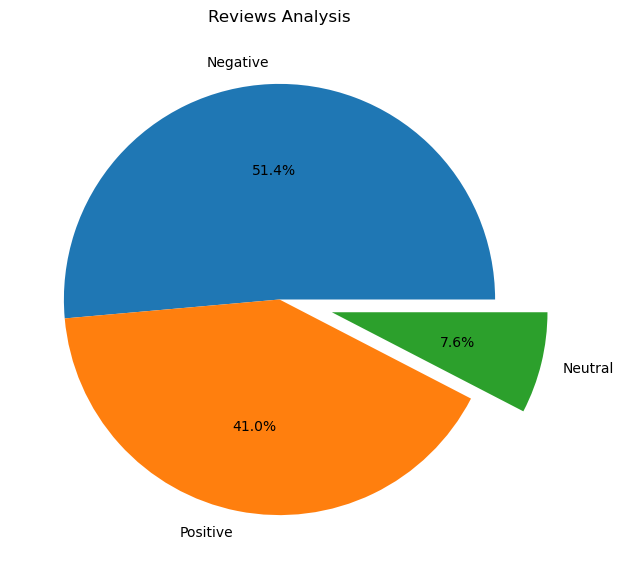

In [41]:
# Assuming Analysis is the column containing sentiment labels in your DataFrame
counts = df['Analysis'].value_counts()

plt.figure(figsize=(15, 7))
plt.title("Reviews Analysis")
plt.pie(counts, labels=counts.index, explode=(0, 0, 0.25), autopct='%1.1f%%', shadow=False)

plt.show()

# this pie chart shows percentage of review based on analysis

In [42]:
pip install pillow


Note: you may need to restart the kernel to use updated packages.


In [46]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import numpy as np

In [55]:
custom_shape = np.array(Image.open('istockphoto-1355587180-612x612.jpg'))

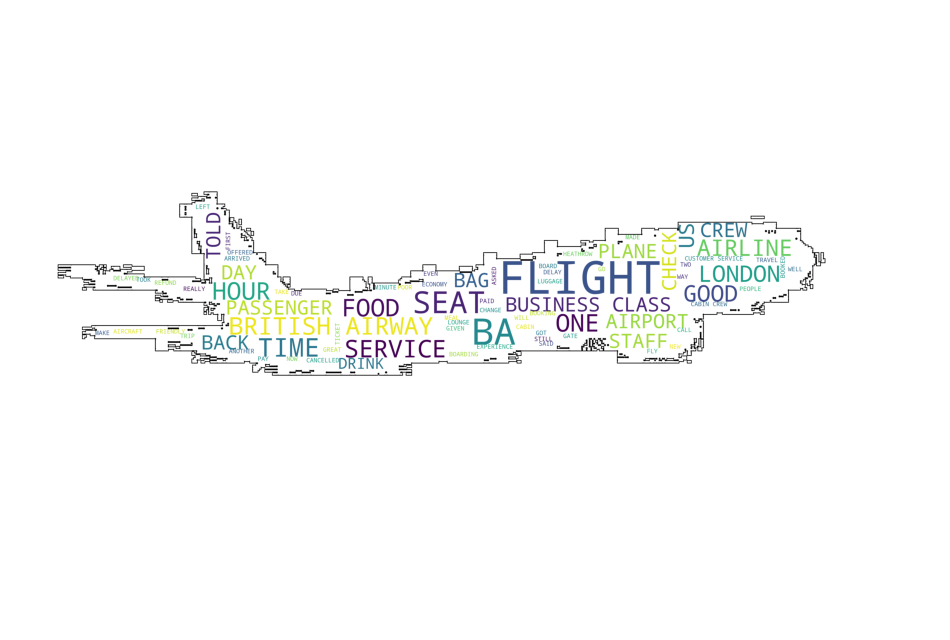

In [57]:
all_reviews = ' '.join(df['Cleaned Reviews'].dropna())

# Create and display WordCloud
plt.figure(figsize=(12, 12))
plt.axis('off')
plt.imshow(WordCloud(background_color='White', stopwords=STOPWORDS, mask=custom_shape, max_words=100, max_font_size=30, scale=10,  contour_color='black',  contour_width=2,  random_state=1).generate(all_reviews))
plt.show()